CogSci 131 Project 1

Fall 2023 🍂

Team: Niki Parker(11am lecture), Shreyas Rana(9am lecture), Calvin Duong(9am Lecture)

In [27]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt


class Neural_Network(object):
    def __init__(self):
        #Define Parameters
        self.inputLayerSize = 2
        self.outputLayerSize =1

        self.hiddenLayerSize =3
        self.hiddenLayer2Size = 5

        #Define Weights
        self.W1=np.random.rand(self.inputLayerSize,self.hiddenLayerSize)
        self.W2=np.random.rand(self.hiddenLayerSize,self.outputLayerSize)
#         self.W3=np.random.rand(self.hiddenLayer2Size, self.outputLayerSize)

    def updateHiddenLayer(self):

        self.W1=np.random.rand(self.inputLayerSize, self.hiddenLayerSize)
        self.W2=np.random.rand(self.hiddenLayerSize, self.hiddenLayer2Size)
        self.W3=np.random.rand(self.hiddenLayer2Size, self.outputLayerSize)

    def forward(self,X):
        #Propagate inputs through network
        self.z2 = np.dot(X,self.W1)
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2,self.W2)
        yHat = self.sigmoid(self.z3)
        return yHat

    def forward_relu(self,X): ###q2 relu foward func
        #Propagate inputs through network
        self.z2 = np.dot(X,self.W1)

        self.a2 = self.relu(self.z2)
        self.z3 = np.dot(self.a2,self.W2)
        self.a3 = self.relu(self.z3)
        self.z4 = np.dot(self.a3,self.W3)

        yHat = self.sigmoid(self.z4) # and modify to be z4
        return yHat

    def sigmoid(self, z):
        #Apply Sigmoid Activation Function
        return 1/(1+np.exp(-z))

    def sigmoidPrime(self,z):
        #Derivative of Sigmoid Function
        return np.exp(-z)/((1+np.exp(-z))**2)

    def relu(self, z):
        return np.maximum(0, z)

    def reluPrime(self,z):
        return 1 * (z > 0)

    def costFunction(self, X, y):
        #Compute Cost Function with weights already stored in class
        self.yHat=self.forward(X)
        J=0.5*sum((y-self.yHat)**2)
        return J

    def costFunction_relu(self, X, y): ###q2 relu cost function
        #Compute Cost Function with weights already stored in class
        self.yHat=self.forward_relu(X)
        J=0.5*sum((y-self.yHat)**2)
        return J

    def costFunctionPrime(self, X, y):
        #Compute derivatives with respect to W1 and W2
        self.yHat=self.forward(X)
        delta3 = np.multiply(-(y-self.yHat),self.sigmoidPrime(self.z3))
        dJdW2=np.dot(self.a2.T,delta3)
        delta2=np.dot(delta3,self.W2.T)*self.sigmoidPrime(self.z2)
        dJdW1=np.dot(X.T,delta2)
        return dJdW1,dJdW2

    def costFunctionPrime_relu(self, X, y): ###q2 relu cost function prime
        #Compute derivatives with respect to W1 and W2
        self.yHat=self.forward_relu(X)

        delta3 = np.multiply(-(y-self.yHat),self.reluPrime(self.z4))
        dJdW3=np.dot(self.a3.T,delta3)

        delta2=np.dot(delta3,self.W3.T)*self.reluPrime(self.z3)
        dJdW2=np.dot(self.a2.T,delta2)

        delta1 = np.dot(delta2,self.W2.T)*self.reluPrime(self.z2)
        djdW1 = np.dot(X.T, delta1)
        return dJdW1, dJdW2, dJdW3


Define the input and output matrix (X = input, Y = output)

In [28]:
X=np.array(([3,5],[5,1],[10,1]),dtype=float)
y=np.array(([75],[80],[93]),dtype=float)

In [29]:
X


array([[ 3.,  5.],
       [ 5.,  1.],
       [10.,  1.]])

In [30]:
y

array([[75.],
       [80.],
       [93.]])

Normalize the input

In [31]:
X=X/np.amax(X,axis=0)
y=y/100

Normalize the output

In [32]:
X,y


(array([[0.3, 1. ],
        [0.5, 0.2],
        [1. , 0.2]]),
 array([[0.75],
        [0.8 ],
        [0.93]]))

Create our neural network (this will be untrained)

In [33]:
NN=Neural_Network()

In [34]:
yH=NN.forward(X)

In [35]:
y

array([[0.75],
       [0.8 ],
       [0.93]])

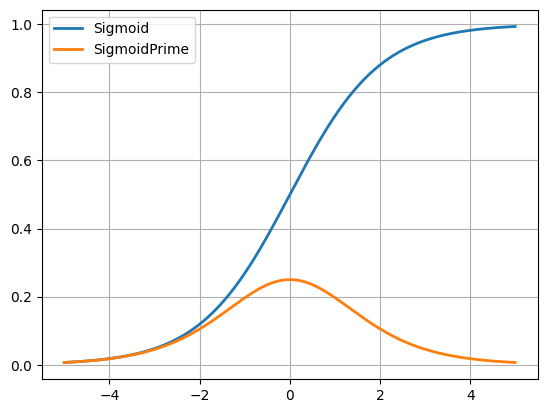

In [36]:
testValues=np.arange(-5,5,0.01)
plt.plot(testValues,NN.sigmoid(testValues),linewidth=2)
plt.plot(testValues, NN.sigmoidPrime(testValues),linewidth=2)
plt.grid(1)
plt.legend(['Sigmoid','SigmoidPrime'])

Create neural network that will be trained by minimizing our cost-function

In [37]:
NN=Neural_Network()

In [38]:
cost1=NN.costFunction(X,y)

In [39]:
cost1

array([0.05182726])

In [40]:
dJdW1,dJdW2=NN.costFunctionPrime(X,y)

In [41]:
dJdW1

array([[-0.00654732, -0.00451994, -0.00944346],
       [-0.00269663, -0.00196535, -0.00406056]])

In [42]:
dJdW2

array([[-0.06957715],
       [-0.07737535],
       [-0.06722914]])

In [43]:
scalar=1
NN.W1 = NN.W1+scalar*dJdW1
NN.W2 = NN.W2+scalar*dJdW2
cost2 = NN.costFunction(X,y)
print (cost1,cost2)

[0.05182726] [0.06914041]


In [44]:
scalar=0.1
NN.W1 = NN.W1-scalar*dJdW1
NN.W2 = NN.W2-scalar*dJdW2
cost3 = NN.costFunction(X,y)
print (cost2,cost3)

[0.06914041] [0.06724575]


We define two neural networks that will be using different scalars. Weights are randomly generated and we run the while loop until our cost gives us an accuracy of 99.998%. We set a scalar of 3 to mark the steps by iteration

336


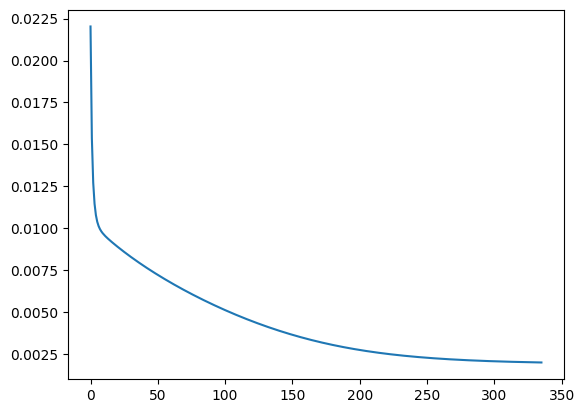

In [45]:
###Q1
NN1 = Neural_Network()
NN2 = Neural_Network()

def min_cost(net, scalar):
    cost_history = []
    iterations = 0
    cost = 100
    while cost > 0.002:
        dJdW1, dJdW2 = net.costFunctionPrime(X, y)
        net.W1 = net.W1 - scalar * dJdW1
        net.W2 = net.W2 - scalar * dJdW2
        cost = net.costFunction(X, y)
        cost_history.append(cost)
        iterations += 1

    plt.plot(cost_history)
    print(iterations)
    return iterations


nn1_iter = min_cost(NN1, 3)

We repeat this with a scalar of 10. Note that using a bigger scalar with plotting the accuracy there will be less iterations but could end up with a oscilating graph if the scalar is too large.

80


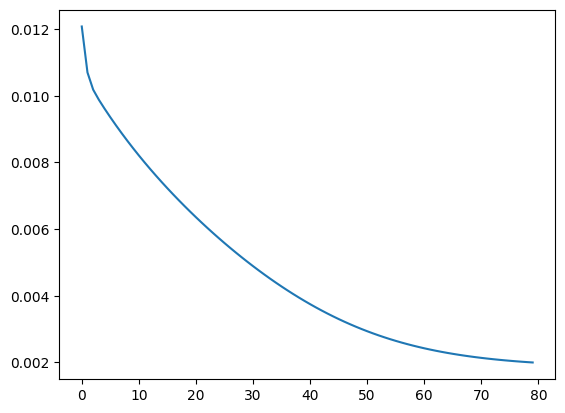

In [46]:
# using a bigger scalar
nn2_iter = min_cost(NN2, 10)

In [47]:
print("low scalar cost iterations: " + str(nn1_iter) + ", vs high scalar cost iterations: " + str(nn2_iter))

low scalar cost iterations: 336, vs high scalar cost iterations: 80


There are three weights instead of two and we update a new hidden layer of our neural network. We replace all sigmoid functions with the relu function to calculate the cost an accuracy of 99.998%. We defined a method called update-HiddenLayer that adds a new hidden layer of size 5. Training takes less time.

36
low scalar cost iterations: 336, vs high scalar cost iterations: 80, vs relu+extra hidden layer cost iterations: 36


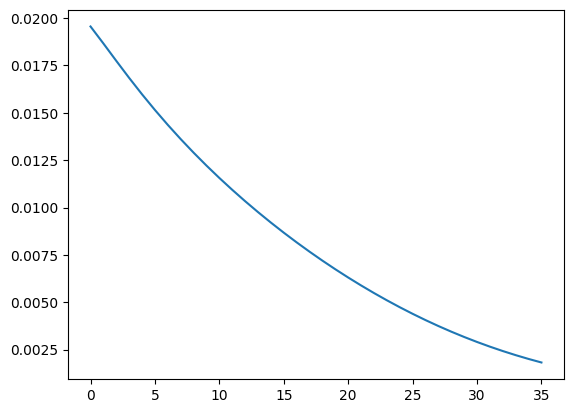

In [48]:
###2

NN3 = Neural_Network()
NN3.updateHiddenLayer() #Adds a new hidden layer of size 5

cost_history3 = []
iterations = 0

cost = 100
while cost > 0.002:
    scalar = 0.5
    dJdW1, dJdW2, dJdW3 = NN3.costFunctionPrime_relu(X, y)
    NN3.W1 = NN3.W1 - scalar * dJdW1
    NN3.W2 = NN3.W2 - scalar * dJdW2
    NN3.W3 = NN3.W3 - scalar * dJdW3
    cost = NN3.costFunction_relu(X, y)
    cost_history3.append(cost)
    iterations += 1
#     print(cost)

plt.plot(cost_history3)
print(iterations)
print("low scalar cost iterations: " + str(nn1_iter) + ", vs high scalar cost iterations: " + str(nn2_iter) + ", vs relu+extra hidden layer cost iterations: " + str(iterations))

To investigate the W space, we decided to do something unique. If you see below, you'll notice that we fit our entire question 3 into one massive function 😱. Fitting all steps in one function will allow us to do something special; we can run this multiple times, allowing us:

The opportunity to explore the trends in our resulting plot
A chance to find the average of our resulting paths, when ran multiple times, and plot that as an average path in its own

Now, time for us to explain what is going into this mega function:
- Perform a **Quadriatic** interpolation using our parameterized sets, theta1, theta2, and theta3
- Apply the elastic band method
- Plot the results


In [49]:
###3

def path_costs_function():
    NN1 = Neural_Network()
    NN2 = Neural_Network()
    NN3 = Neural_Network()

    min_cost(NN1, 10)
    min_cost(NN2, 10)
    min_cost(NN3, 10)

    X = np.array(([3, 5], [5, 1], [10, 1]), dtype=float)
    y = np.array(([75], [80], [93]), dtype=float)
    X = X / np.amax(X, axis=0)
    y = y / 100

    theta1 = [NN1.W1, NN1.W2]
    theta2 = [NN2.W1, NN2.W2]
    theta3 = [NN3.W1, NN3.W2]

    time = np.arange(0, 1.001, 0.05)



    w_hatlist = []

    for t in time:
      # Quadratic interpolation
      w_hat1 = (1 - t)**2 * theta1[0] + 2 * (1 - t) * t * theta2[0] + t**2 * theta3[0]
      w_hat2 = (1 - t)**2 * theta1[1] + 2 * (1 - t) * t * theta2[1] + t**2 * theta3[1]
      w_hatlist.append([w_hat1, w_hat2])

    tempnet = Neural_Network()
    #created a temporary neural network whose weights will depend on the values in our w hat list.
    #We apply the cost function to the temporary neural network, and stored the result in a costs list
    #created a list to store costs using our w hat list
    costs = []
    iterations = np.arange(0, len(time))
    for i in range(len(time)):
        tempnet.W1 = w_hatlist[i][0]
        tempnet.W2 = w_hatlist[i][1]
        cost = tempnet.costFunction(X, y)
        costs.append(cost)


    tempnet = Neural_Network()
    def lossgradient(p):
        tempnet.W1, tempnet.W2 = p
        return tempnet.costFunctionPrime(X, y)

    def energyprime(i, k):
        gradient1, gradient2 = lossgradient(p[i])
        return gradient1 - k * (p[i+1][0] - p[i][0]), gradient2 - k * (p[i+1][1] - p[i][1])


    p = w_hatlist
    k = 1 # spring force constant
    lr = 1 # learning rate
    num_iterations = 0
    while(True):
        try:
            for a in range(1, len(p)-1):
                gradient1, gradient2 = energyprime(num_iterations, k) #We find the gradient by applying the energyprime function to the interation number and our constant k
                p[a][0] = p[a][0] - lr * gradient1 # we update w1 for our values in p
                p[a][1] = p[a][1] - lr * gradient2 # we update w2 for our values in p
        except:
            break
        num_iterations += 1
    path = p #we set path to our modified p(w hat list)


    path_costs = [] #we create a list to store costs using our new path
    for i in range(len(path)):
        tempnet.W1 = path[i][0]
        tempnet.W2 = path[i][1]
        cost = tempnet.costFunction(X, y)
        path_costs.append(cost)

    return path_costs, costs

In an effort to cultivate our curious spirits 🤓, we decided to go a step further and see whether we could run this multiple times and calculuate an "average" result, which we did through fitting our code for q3 into a massive function. In our example we ran this three times, but this can easily be replicated into a desired size through a modification of the "arr" and "costs" variables in our code below(size limitations will depend on variables such as the length of inputs to the path_costs_function). We hope this will bring forward a more averaged version that can be used as a means of statistical comparison and analysis with future runs. The possibilities are endless!

83
88
99
105
97
61
106
85
67
Ignore outputs


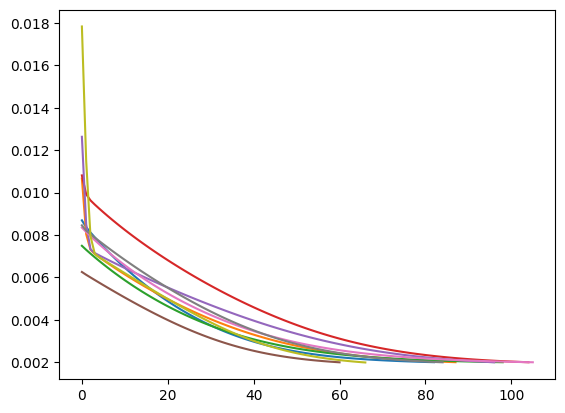

In [50]:
arr1, costs1 = path_costs_function()
arr2, costs2 = path_costs_function()
arr3, costs3 = path_costs_function()
print("Ignore outputs")

Here's what our graph looks like when we plot all 3 runs against our quadriatic path

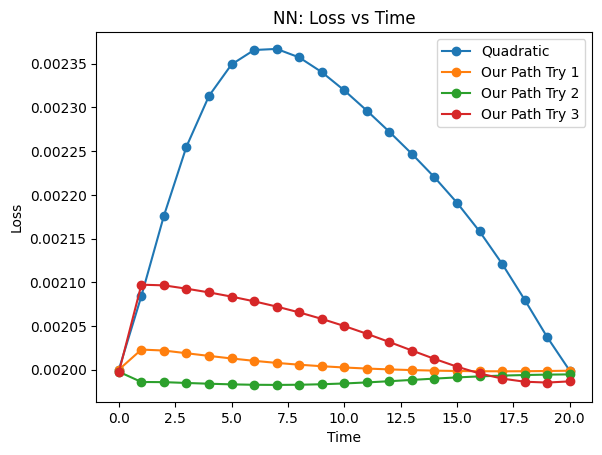

In [51]:
plt.plot(costs1, marker='o', label='Quadratic')
plt.plot(arr1, marker='o', label='Our Path Try 1');
plt.plot(arr2, marker='o', label='Our Path Try 2');
plt.plot(arr3, marker='o', label='Our Path Try 3');
plt.legend()
plt.title("NN: Loss vs Time")
plt.xlabel("Time");
plt.ylabel("Loss");

Now we will calculate the average of the three arrays per value(labeled averagearr), so that each set of values per index is averaged. Once we have the averagearr, it's time to witness the magic (the average of our three runs) 😍

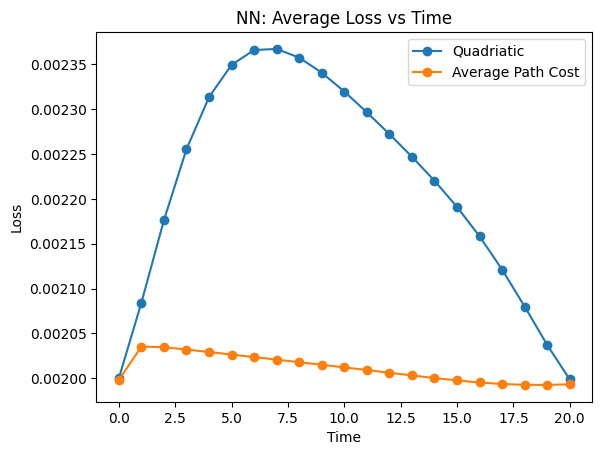

In [52]:
averagearr = [i/3 for i in (np.array(arr1) + np.array(arr2) + np.array(arr3)) ] #computes the average of the three arrays.

plt.plot(costs1, marker='o', label='Quadriatic')
plt.plot(averagearr, marker='o', label='Average Path Cost');
plt.legend()
plt.title("NN: Average Loss vs Time")
plt.xlabel("Time");
plt.ylabel("Loss");

Isn't that gorgeous?!